In [ ]:
from pycocotools.coco import COCO

annotation_file = "label_data/train.json"
image_dir = "label_data/images"

coco_train = COCO(annotation_file)

# Check the categories in the dataset
categories = coco_train.loadCats(coco_train.getCatIds())
category_names = [category["name"] for category in categories]
print(
    "There are {} categories in the dataset. The categories are: {}".format(
        len(categories), category_names
    )
)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
There are 10 categories in the dataset. The categories are: ['box', 'child', 'green_light', 'left_arrow', 'no_light', 'person', 'red_light', 'right_arrow', 'tree', 'unknown_arrow']


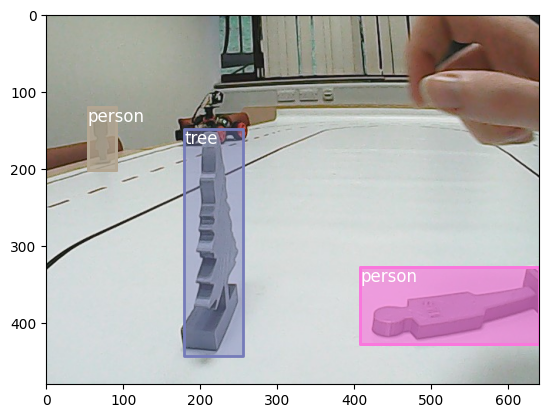

In [ ]:
# Load a random image, display it + annotations
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
import numpy as np

img = coco_train.loadImgs([1])[0]
img = plt.imread(image_dir + "/" + img["file_name"])

plt.imshow(img)

# Plot bounding boxes
ann_ids = coco_train.getAnnIds(imgIds=[1])
anns = coco_train.loadAnns(ann_ids)

ax = plt.gca()
ax.set_autoscale_on(False)
polygons = []
color = []

for ann in anns:
    c = (np.random.random((1, 3)) * 0.6 + 0.4).tolist()[0]

    [bbox_x, bbox_y, bbox_w, bbox_h] = ann["bbox"]
    poly = [
        [bbox_x, bbox_y],
        [bbox_x, bbox_y + bbox_h],
        [bbox_x + bbox_w, bbox_y + bbox_h],
        [bbox_x + bbox_w, bbox_y],
    ]
    np_poly = np.array(poly).reshape((4, 2))
    polygons.append(Polygon(np_poly))
    color.append(c)

    p = PatchCollection(polygons, facecolors=color, linewidths=0, alpha=0.4)
    ax.add_collection(p)
    p = PatchCollection(polygons, facecolors="none", edgecolors=color, linewidths=2)
    ax.add_collection(p)

    # Add the category label
    category_id = ann["category_id"]
    category = coco_train.cats[category_id]["name"]
    plt.text(
        bbox_x, bbox_y, category, fontsize=12, color="white", verticalalignment="top"
    )

plt.show()

In [ ]:
from pprint import pprint

# Load annotations for all images
img_ids = coco_train.getImgIds()
all_annotations = []
for img_id in img_ids:
    img = coco_train.loadImgs([img_id])[0]
    ann_ids = coco_train.getAnnIds(imgIds=[img_id])
    anns = coco_train.loadAnns(ann_ids)
    all_annotations.append(anns)

print("Number of images: {}".format(len(all_annotations)))

# Train/test split
import random

random.seed(0)
random.shuffle(all_annotations)
split = int(0.8 * len(all_annotations))
train_annotations = all_annotations[:split]
test_annotations = all_annotations[split:]

print("Number of training images: {}".format(len(train_annotations)))
print("Number of test images: {}".format(len(test_annotations)))

Number of images: 304
Number of training images: 243
Number of test images: 61


In [1]:
from pycocotools.coco import COCO

annotation_file = "label_data/label_kaggle_training/result.json"
image_dir = "label_data/label_kaggle_training/images"

coco_train = COCO(annotation_file)

# Check the categories in the dataset
categories = coco_train.loadCats(coco_train.getCatIds())
category_names = [category["name"] for category in categories]
print(
    "There are {} categories in the dataset. The categories are: {}".format(
        len(categories), category_names
    )
)

loading annotations into memory...
Done (t=0.07s)
creating index...
index created!
There are 9 categories in the dataset. The categories are: ['box', 'green_light', 'left_arrow', 'no_light', 'person', 'red_light', 'right_arrow', 'tree', 'unknown_arrow']


Number of images in the right_arrow category: 443
Saved right_arrow_ids.csv
Number of images in the left_arrow category: 280
Saved left_arrow_ids.csv


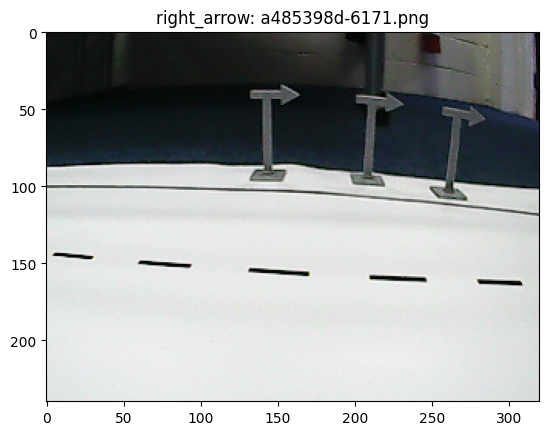

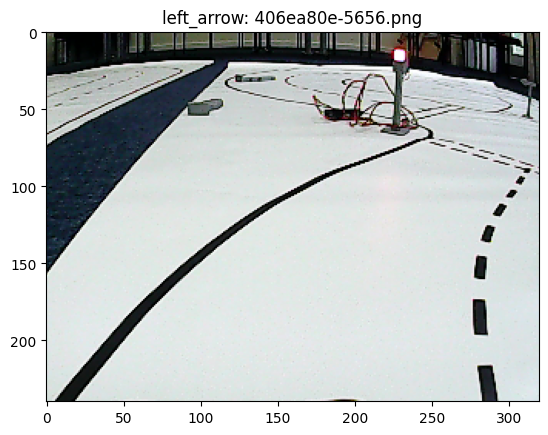

In [16]:
import pandas as pd
import matplotlib.pyplot as plt


def filter_categories(category_name):
    # Get the category ID for the given category name
    category_id = coco_train.getCatIds(catNms=[category_name])[0]

    # Get the image IDs for the given category
    img_ids = coco_train.getImgIds(catIds=[category_id])

    # Load the images
    imgs = coco_train.loadImgs(img_ids)

    # Get the file paths of the images
    paths = [img["file_name"] for img in imgs]
    # print(paths)

    # Display the first image
    plt.figure()
    plt.imshow(plt.imread(image_dir + "/" + paths[0]))
    plt.title(f"{category_name}: {paths[0]}")

    # Extract the image IDs from the file paths
    image_ids = [path.split("-")[1].split(".")[0] for path in paths]

    # Save the image IDs to a CSV file
    pd.DataFrame(image_ids, columns=["Image ID"]).to_csv(
        f"{category_name}_ids.csv", index=False
    )

    print(f"Number of images in the {category_name} category: {len(image_ids)}")
    print(f"Saved {category_name}_ids.csv")


filter_categories("right_arrow")
filter_categories("left_arrow")